<a href="https://colab.research.google.com/github/Dennieeeee/KPMG-virtual-internship/blob/master/KPMG_new_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview:
This dataset contains variables gender, transaction_date, online_order order_status, brand, product_line, product_class, product_size, list_price,  standard_cost.

Business question is to target the right customer for each brand.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from pylab import rcParams

# Fit the ARIMA model
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from matplotlib import pyplot

from pandas import read_csv
import statsmodels
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Dennieeeee/KPMG-virtual-internship/master/KPMG_data2.csv')

In [ ]:
new = pd.read_csv('https://raw.githubusercontent.com/Dennieeeee/KPMG-virtual-internship/master/NewCustomerList.csv')

# Preparing the Dataset

In [ ]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure', 'address', 'postcode', 'state',
       'country', 'property_valuation'],
      dtype='object')

In [ ]:
features_drop = ['transaction_id', 'product_id', 'customer_id','default']
df = df.drop(features_drop, axis=1)

In [90]:
print(df.iloc[:,[2,4]].head())

  order_status product_line
0     Approved     Standard
1     Approved     Standard
2     Approved     Standard
3     Approved     Standard
4     Approved     Standard


In [ ]:
df.shape

(19968, 26)

In [ ]:
new.head(1)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,7/12/1957,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.97,1.2125,1.515625,1.288281,1,1,1.71875


In [ ]:
new.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [ ]:
new['DOB'] = pd.to_datetime(new['DOB'])

In [ ]:
features_drop = ['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18','Unnamed: 19', 'Unnamed: 20']
new = new.drop(features_drop, axis=1)

### Data Cleansing
- Age
- Keep data in State and Gender consistent

In [ ]:
#convert transaction date to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [ ]:
#convert DOB data type to datetime
df['DOB'] = pd.to_datetime(df['DOB'])
df['year'] = df['DOB'].dt.year

df1 = df[df["year"] > 1941]
#According to Google, the average human lifespan is 79 year old.
#It makes more sense to target customers who are more likely are still alive
#Remove the customers with age over 79.

In [ ]:
df1['year'].max()

2002.0

In [ ]:
df1['gender'].value_counts()

Female    9971
Male      9500
F           11
Femal        7
M            6
Name: gender, dtype: int64

In [ ]:
df1['gender'] = df1['gender'].replace({'F':'Female','M':'Male','Femal':'Female'})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df1['gender'].value_counts()

Female    9989
Male      9506
Name: gender, dtype: int64

In [ ]:
#subset data to people born between 2000 to 1970: age of 20 to 50 
df1 = df1[(df1['year'] >= 1970) & (df1['year'] <= 2000)]
print(df1.shape)

(13798, 27)


In [ ]:
df1.head(1)

,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,year
3,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5,1979.0


In [ ]:
print(df1['online_order'].value_counts())
print()
print(df1['brand'].value_counts())
print()
print(df1['product_line'].value_counts())
print()
print(df1['product_class'].value_counts())
print()
print(df1['job_title'].value_counts())
print()
print(df1['job_industry_category'].value_counts())
print()
print(df1['wealth_segment'].value_counts())
print()
print(df1['deceased_indicator'].value_counts())
print()
print(df1['owns_car'].value_counts())
print()
print(df1['state'].value_counts())
print()
print(df1['country'].value_counts())

True     6807
False    6748
Name: online_order, dtype: int64

Solex             2974
Giant Bicycles    2249
WeareA2B          2239
OHM Cycles        2111
Trek Bicycles     2065
Norco Bicycles    2025
Name: brand, dtype: int64

Standard    9757
Road        2760
Touring      838
Mountain     308
Name: product_line, dtype: int64

medium    9501
high      2087
low       2075
Name: product_class, dtype: int64

Nuclear Power Engineer                  167
Tax Accountant                          167
Executive Secretary                     165
Business Systems Development Analyst    163
Social Worker                           155
                                       ... 
Media Manager II                         10
Account Representative II                 9
Web Developer II                          8
Programmer Analyst I                      6
Geologist II                              2
Name: job_title, Length: 192, dtype: int64

Financial Services    2817
Manufacturing         2781
Health   

In [ ]:
#change VIC to Victoria in state
df1['state'] = df1['state'].replace({'VIC':'Victoria'})

In [ ]:
df1['state'].value_counts()

NSW                7141
Victoria           3369
QLD                3001
New South Wales     287
Name: state, dtype: int64

In [ ]:
#sample size of online order: Yes and No
online_order_yes = df1.loc[df1['online_order']==1]
online_order_no = df1.loc[df1['online_order']==0]
print(online_order_yes.shape,online_order_no.shape)

(6807, 27) (6748, 27)


In [ ]:
#sample size of female and male guests
female = df1.loc[df1['gender']=='Female']
male = df1.loc[df1['gender']=='Male']
print(female.shape,male.shape)

(7077, 27) (6721, 27)


In [ ]:
df1['gender'].value_counts()

Female    7077
Male      6721
Name: gender, dtype: int64

In [ ]:
df1.groupby('gender').agg({'list_price':'mean'})

,list_price
gender,
Female,1095.469313
Male,1113.005452


In [ ]:

#online itmes are cheaper
df1.groupby('online_order').agg({'list_price':'mean'})

,list_price
online_order,
False,1103.589923
True,1103.114329


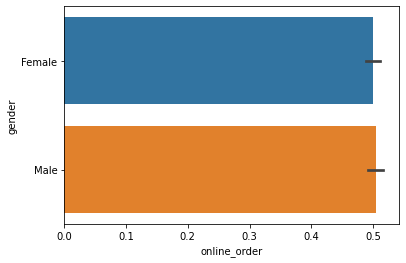

In [ ]:
sns.barplot(x='online_order',y='gender',data=df1)

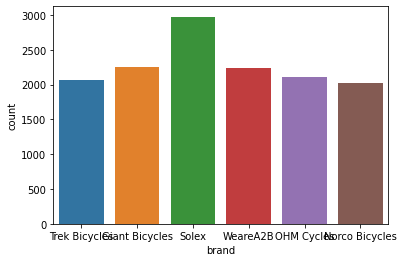

In [ ]:
sns.countplot(x='brand',data=df1)

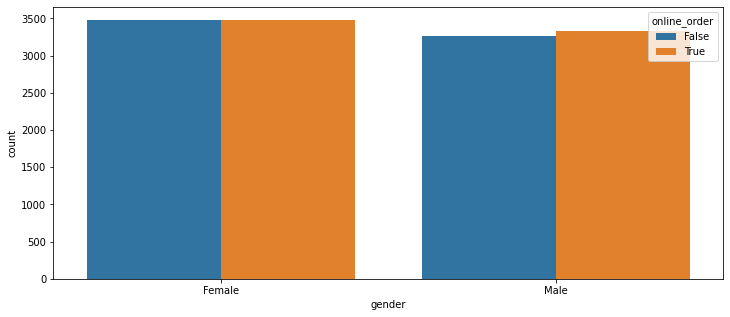

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='gender', hue='online_order',data=df1)
plt.show()

In [ ]:
men = df1.loc[df1['gender'] == 'Male']
women = df1.loc[df1['gender'] == 'Female']

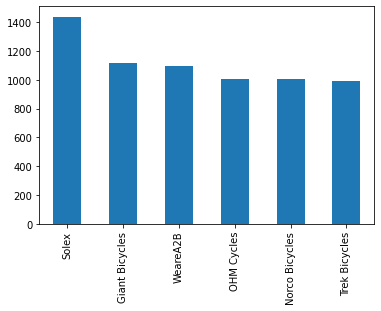

In [ ]:
men['brand'].value_counts().plot(kind='bar')

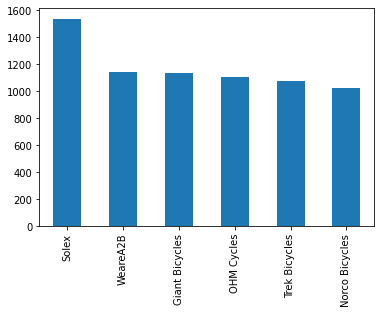

In [ ]:
women['brand'].value_counts().plot(kind='bar')

In [ ]:
df1.head(1)

,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,year
3,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5,1979.0


In [ ]:
#create a new column: age
df1['age'] = round(2020 - df1['year'])

In [ ]:
print('The minimum age is: ',df1['age'].min(), 'The maximum age is: ', df1['age'].max())

The minimum age is:  20.0 The maximum age is:  50.0


In [ ]:
hist(df1['age'])

In [ ]:
df1.to_csv('New_KPMG_Data.csv',index=False)

# Descriptive Statistics AND Exploratory Data Analysis


Questions: 
1. Do men have higher buying power than women?
2. What's the most popular brand among the two groups: women and men?
3. What's the most popular brand among the women and men who have high power?
4. How wealth segment influenced the sales volumne of each brand?

- Note: list_price higher than the mean is considered as high buying power
- the average list price is 1108

###Which group has the highest buying power?

In [ ]:
df1.columns

Index(['transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'first_name', 'last_name',
       'gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'year', 'age'],
      dtype='object')

In [ ]:
#split the df1 into groups: male and female
male = df1[df1['gender']=='Male']
female=df1[df1['gender']=='Female']

In [ ]:
#split the df1 into two groups with high buying power
male1 = df1[(df1.gender == 'Male') & (df1.list_price > 1108)]
female1 = df1[(df1.gender == 'Female') & (df1.list_price > 1108)]

In [ ]:
print (np.shape(male1), np.shape(male))

(3613, 28) (6721, 28)


In [ ]:
print (np.shape(female1), np.shape(female))

(3716, 28) (7077, 28)


In [ ]:
#people who have the high buying power among the entire dataset
df2 = df1[df1.list_price > 1108]

In [ ]:
print ('The rate of people with high buying power is: ',
    int(len(df2) / float(len(df1)) * 100), '%.')
print('The rate of men with high buying power is: ',
      int(len(male1)/float(len(male)) * 100), '%,')
print('The rate of female with high buying power is: ',
      int(len(female1)/float(len(female)) * 100), '%,')

The rate of people with high buying power is:  53 %.
The rate of men with high buying power is:  53 %,
The rate of female with high buying power is:  52 %,


###What's the most popular brand among all the people regardless of their buying power.

In [ ]:
df1['brand'].value_counts()

Solex             2974
Giant Bicycles    2249
WeareA2B          2239
OHM Cycles        2111
Trek Bicycles     2065
Norco Bicycles    2025
Name: brand, dtype: int64

In [ ]:
solex = df1[df1.brand == 'Solex']
giant_bicycles = df1[df1.brand == 'Giant Bicycles']
weareA2B = df1[df1.brand == 'WeareA2B']
OHM_cycles = df1[df1.brand == 'OHM Cycles']
trek_bicycles = df1[df1.brand == 'Trek Bicycles']
norco_bicycles = df1[df1.brand == 'Norco Bicycles']

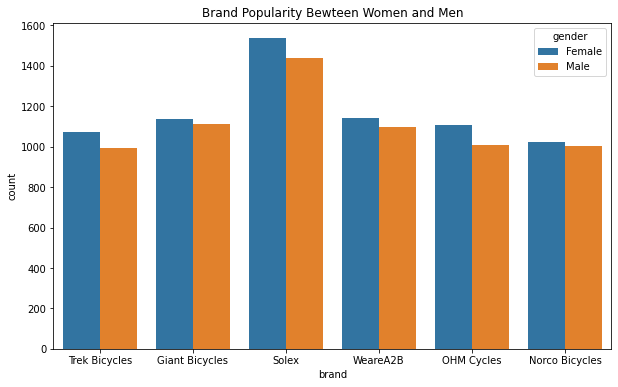

In [96]:
plt.figure(figsize=(10,6))
plt.title('Brand Popularity Bewteen Women and Men')
sns.countplot(x='brand',hue='gender',data=df1)

In [ ]:
print ('The rate of Solex is: ', round((len(solex)/len(df1))*100,2), '%. This is the most popular brand among all the people')
print ('The rate of Giant Bicycles is: ', round(len(giant_bicycles)/len(df1)*100,2), '%.')
print ('The rate of WeareA2B is: ',
       round(len(weareA2B)/len(df1)*100,2), '%.')
print ('The rate of OHM Cycles is: ',
       round(len(OHM_cycles)/len(df1)*100,2), '%.')
print ('The rate of Trek Bicycles is: ',
       round(len(trek_bicycles)/len(df1)*100,2), '%.')
print ('The rate of Norco Bicycles is: ',
       round(len(norco_bicycles)/len(df1)*100,2), '%.')

The rate of Solex is:  21.55 %. This is the most popular brand among all the people
The rate of Giant Bicycles is:  16.3 %.
The rate of WeareA2B is:  16.23 %.
The rate of OHM Cycles is:  15.3 %.
The rate of Trek Bicycles is:  14.97 %.
The rate of Norco Bicycles is:  14.68 %.


In [ ]:
#find the most popular brand between women and men of the entire dataset
#Solex
solex_m = solex[solex.gender == 'Male']
solex_f = solex[solex.gender == 'Female']
#Giant Bicycles
giant_bicycles_m = giant_bicycles[giant_bicycles.gender == 'Male']
giant_bicycles_f = giant_bicycles[giant_bicycles.gender == 'Female']
#WeareA2B
weareA2B_m = weareA2B[weareA2B.gender == 'Male']
weareA2B_f = weareA2B[weareA2B.gender == 'Female']
#OHM_cycles
OHM_cycles_m = OHM_cycles[OHM_cycles.gender == 'Male']
OHM_cycles_f = OHM_cycles[OHM_cycles.gender == 'Female']
#trek bicycles
trek_bicyles_m = trek_bicycles[trek_bicycles.gender == 'Male']
trek_bicyles_f = trek_bicycles[trek_bicycles.gender == 'Female']
#Norco Bicycles
norco_bicycles_m = norco_bicycles[norco_bicycles.gender == 'Male']
norco_bicycles_f = norco_bicycles[norco_bicycles.gender == 'Female']

In [ ]:
print('The percent of men like Solex is: ', round(len(solex_m)/len(solex)*100,2), '%.')
print('The percent of women like Solex is: ', round(len(solex_f)/len(solex)*100,2), '%.')
print ('More women like Solex than men.')

The percent of men like Solex is:  48.32 %.
The percent of women like Solex is:  51.68 %.
More women like Solex than men.


In [ ]:
#
print('The percent of men like Giant Bicycles is: ', round(len(giant_bicycles_m)/len(giant_bicycles)*100,2), '%.')
print('The percent of women like Giant Bicycles is: ', round(len(giant_bicycles_f)/len(giant_bicycles)*100,2), '%.')
print ('More women like Giant Bicycles than men.')


The percent of men like Giant Bicycles is:  49.53 %.
The percent of women like Giant Bicycles is:  50.47 %.
More women like Giant Bicycles than men.


In [ ]:
print('The percent of men like WeareA2B is: ', round(len(weareA2B_m)/len(weareA2B)*100,2), '%.')
print('The percent of women like WeareA2B is: ', round(len(weareA2B_f)/len(weareA2B)*100,2), '%.')
print ('More women like WeareA2B than men.')


The percent of men like WeareA2B is:  49.0 %.
The percent of women like WeareA2B is:  51.0 %.
More women like WeareA2B than men.


In [ ]:
#
print('The percent of men like OHM Cycles is: ', round(len(OHM_cycles_m)/len(OHM_cycles)*100,2), '%.')
print('The percent of women like OHM Cycles is: ', round(len(OHM_cycles_f)/len(OHM_cycles)*100,2), '%.')
print ('More women like OHM Cycles than men.')

The percent of men like OHM Cycles is:  47.66 %.
The percent of women like OHM Cycles is:  52.34 %.
More women like OHM Cycles than men.


In [ ]:
print('The percent of men like Trek Bicycles is: ', round(len(trek_bicyles_m)/len(trek_bicycles)*100,2), '%.')
print('The percent of women like Trek Bicycles is: ', round(len(trek_bicyles_f)/len(trek_bicycles)*100,2), '%.')

The percent of men like Trek Bicycles is:  48.04 %.
The percent of women like Trek Bicycles is:  51.96 %.


In [ ]:
print('The percent of men like Norco Bicycles is: ', round(len(norco_bicycles_m)/len(norco_bicycles)*100,2), '%.')
print('The percent of women like Norco Bicycles is: ', round(len(norco_bicycles_f)/len(norco_bicycles)*100,2), '%.')

The percent of men like Norco Bicycles is:  49.58 %.
The percent of women like Norco Bicycles is:  50.42 %.


###Among the people who have high buying power, what do they like to buy?

In [ ]:
df2['brand'].value_counts()

WeareA2B          1628
Giant Bicycles    1556
Solex             1368
Trek Bicycles      982
OHM Cycles         920
Norco Bicycles     806
Name: brand, dtype: int64

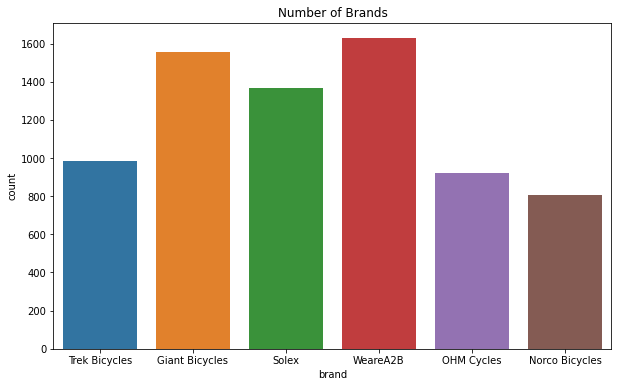

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Number of Brands')
sns.countplot(x='brand',data=df2)

In [ ]:
df2_solex = df2[df2.brand == 'Solex']
df2_giant_bicycles = df2[df2.brand == 'Giant Bicycles']
df2_weareA2B = df2[df2.brand == 'WeareA2B']
df2_OHM_cycles = df2[df2.brand == 'OHM Cycles']
df2_trek_bicycles = df2[df2.brand == 'Trek Bicycles']
df2_norco_bicycles = df2[df2.brand == 'Norco Bicycles']

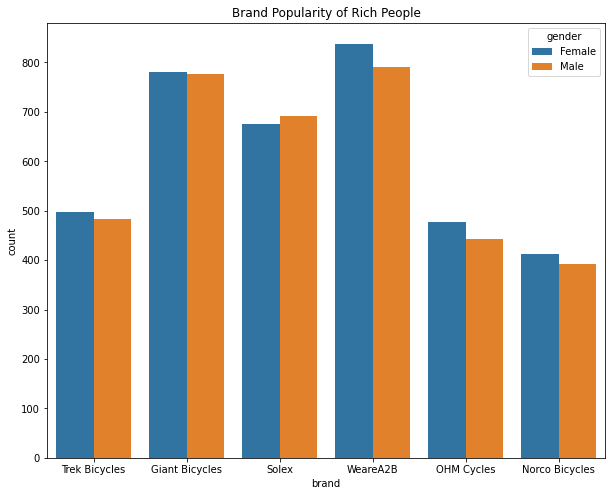

In [98]:
plt.figure(figsize=(10,8))
plt.title('Brand Popularity of Rich People')
sns.countplot(x='brand',hue='gender',data=df2)

In [ ]:
#find the most popular brand between women and men of people who have high buying power
#Solex
df2_solex_m = df2_solex[df2_solex.gender == 'Male']
df2_solex_f = df2_solex[df2_solex.gender == 'Female']
#Giant Bicycles
df2_giant_bicycles_m = df2_giant_bicycles[df2_giant_bicycles.gender == 'Male']
df2_giant_bicycles_f = df2_giant_bicycles[df2_giant_bicycles.gender == 'Female']
#WeareA2B
df2_weareA2B_m = df2_weareA2B[df2_weareA2B.gender == 'Male']
df2_weareA2B_f = df2_weareA2B[df2_weareA2B.gender == 'Female']
#OHM_cycles
df2_OHM_cycles_m = df2_OHM_cycles[df2_OHM_cycles.gender == 'Male']
df2_OHM_cycles_f = df2_OHM_cycles[df2_OHM_cycles.gender == 'Female']
#trek bicycles
df2_trek_bicyles_m = df2_trek_bicycles[df2_trek_bicycles.gender == 'Male']
df2_trek_bicyles_f = df2_trek_bicycles[df2_trek_bicycles.gender == 'Female']
#Norco Bicycles
df2_norco_bicycles_m = df2_norco_bicycles[df2_norco_bicycles.gender == 'Male']
df2_norco_bicycles_f = df2_norco_bicycles[df2_norco_bicycles.gender == 'Female']

In [ ]:
#solex
print('The percent of men purchased Solex is: ', round(len(df2_solex_m)/len(df2_solex)*100,2), '%.')
print('The percent of women purchased Solex is: ', round(len(df2_solex_f)/len(df2_solex)*100,2), '%.')
print ('More men purchased Giant Bicycles than women.')

The percent of men purchased Solex is:  50.58 %.
The percent of women purchased Solex is:  49.42 %.
More men purchased Giant Bicycles than women.


In [ ]:
#Giant Bicycles
print('The percent of men like Giant Bicycles is: ', round(len(df2_giant_bicycles_m)/len(df2_giant_bicycles)*100,2), '%.')
print('The percent of women like Giant Bicycles is: ', round(len(df2_giant_bicycles_f)/len(df2_giant_bicycles)*100,2), '%.')
print ('More men purchased Giant Bicycles than women.')

The percent of men like Giant Bicycles is:  49.87 %.
The percent of women like Giant Bicycles is:  50.13 %.
More men purchased Giant Bicycles than women.


In [ ]:
#WeareA2B
print('The percent of men like WeareA2B is: ', round(len(df2_weareA2B_m)/len(df2_weareA2B)*100,2), '%.')
print('The percent of women like WeareA2B is: ', round(len(df2_weareA2B_f)/len(df2_weareA2B)*100,2), '%.')
print ('More women purchased WeareA2B than men.')

The percent of men like WeareA2B is:  48.53 %.
The percent of women like WeareA2B is:  51.47 %.
More women purchased WeareA2B than men.


In [ ]:
#OHM Cycles
print('The percent of men like OHM Cycles is: ', round(len(df2_OHM_cycles_m)/len(df2_OHM_cycles)*100,2), '%.')
print('The percent of women like OHM Cycles is: ', round(len(df2_OHM_cycles_f)/len(df2_OHM_cycles)*100,2), '%.')
print ('More women like OHM Cycles than men.')

The percent of men like OHM Cycles is:  48.04 %.
The percent of women like OHM Cycles is:  51.96 %.
More women like OHM Cycles than men.


In [ ]:
#Trek Bicycles
print('The percent of men like Trek Bicycles is: ', round(len(df2_trek_bicyles_m)/len(df2_trek_bicycles)*100,2), '%.')
print('The percent of women like Trek Bicycles is: ', round(len(df2_trek_bicyles_f)/len(df2_trek_bicycles)*100,2), '%.')
print ('More men like Trek Bicycles than women.')

The percent of men like Trek Bicycles is:  49.29 %.
The percent of women like Trek Bicycles is:  50.71 %.
More men like Trek Bicycles than women.


In [ ]:
#Norco Bicycles
print('The percent of men like Norco Bicycles is: ', round(len(df2_norco_bicycles_m)/len(df2_norco_bicycles)*100,2), '%.')
print('The percent of women like Norco Bicycles is: ', round(len(df2_norco_bicycles_f)/len(df2_norco_bicycles)*100,2), '%.')
print ('More women like Norco Bicycles than men.')

The percent of men like Norco Bicycles is:  48.76 %.
The percent of women like Norco Bicycles is:  51.24 %.
More women like Norco Bicycles than men.


### How's Wealth Segment Affecting the Buying Power?
Do different wealth segment influence customer's ability to buy stuff?

In [ ]:
df1['wealth_segment'].value_counts()

Mass Customer        6908
High Net Worth       3525
Affluent Customer    3365
Name: wealth_segment, dtype: int64

In [ ]:
mass = df1[df1['wealth_segment'] == 'Mass Customer']
high = df1[df1['wealth_segment'] == 'High Net Worth']
affluent = df1[df1['wealth_segment'] == 'Affluent Customer'] 

In [ ]:
mass_m = mass[mass['gender'] == 'men']
mass_f = mass[mass['gender'] == 'women']

high_m = high[high['gender'] == 'men']
high_f = high[high['gender'] == 'women']

affluent_m = affluent[affluent['gender'] == 'men']
affluent_f = affluent[affluent['gender'] == 'women']

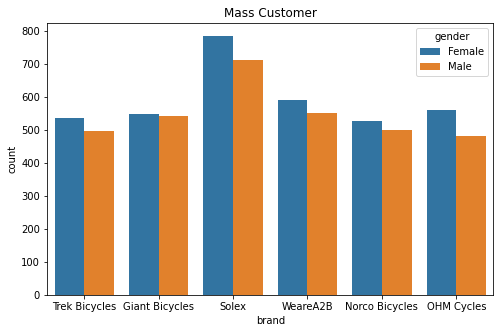

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Mass Customer')
sns.countplot(x='brand',hue='gender',data=mass) #mass customer only

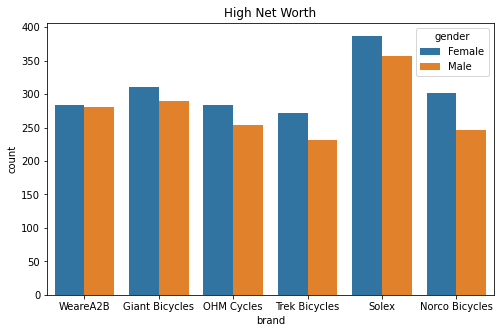

In [ ]:
plt.figure(figsize=(8,5))
plt.title('High Net Worth')
sns.countplot(x='brand',hue='gender',data=high) #High Net Worth customer only

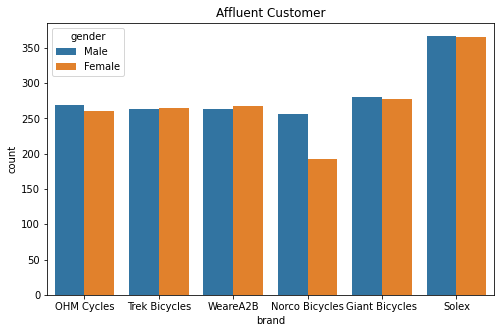

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Affluent Customer')
sns.countplot(x='brand',hue='gender',data=affluent) #Affluent customer only

#Conclusion
Generally, men have higher buying power than women. However, if we don't consider who has higher buying power, women are more likely to buy all brands than men. If we want to target people who have the high buying power, their favorite brand is WearA2B. Women who has high buying power like all brands except slight off on Solex. Men who have high buying power tend to buy Solex.


## New Customer data

In [ ]:
new['year'] = new['DOB'].dt.year

In [ ]:
new = new[new['year'] >= 1970]
new = new[new['year'] <= 2000]

In [ ]:
new['DOB'].max()

Timestamp('2000-12-09 00:00:00')

In [ ]:
new['name'] = new['first_name'] + ' ' + new['last_name']

In [ ]:
ax = new.sort_values(by='past_3_years_bike_related_purchases',ascending=False)
ax[['name','gender','past_3_years_bike_related_purchases']].head(10)

,name,gender,past_3_years_bike_related_purchases
748,Mikol Eck,Male,99
272,Theresa Cowper,Female,99
546,Sammy Borsi,Female,99
359,Pace Clemonts,Male,99
652,Leticia Hovenden,Female,98
931,Kizzee Agget,Female,98
75,Hasheem Groucock,Male,98
783,Calhoun Mussington,Male,98
683,Selle Casper,Female,98
421,Etan Prinett,Male,97


In [ ]:
ax = new.sort_values(by='past_3_years_bike_related_purchases')
ax[['name','gender','past_3_years_bike_related_purchases']].head()

,name,gender,past_3_years_bike_related_purchases
798,Cherye Stanfield,Female,0
113,Meriel Tapp,Female,0
545,Katy Crooke,Female,0
225,Hersh Stubbert,Male,0
451,Katie Warhurst,Female,0


# Data Model Development

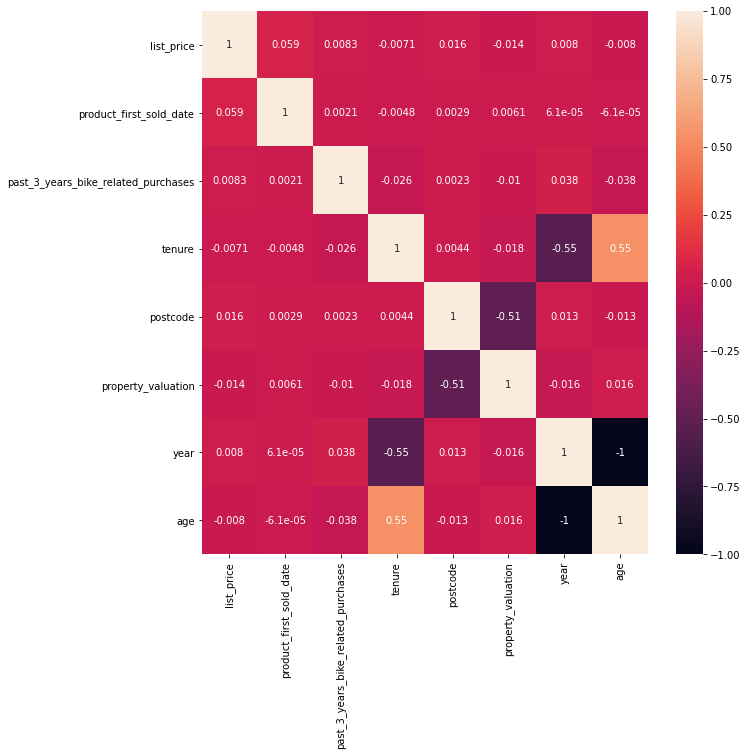

In [ ]:
plt.figure(figsize=(10,10))
corrMatrix = df1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()